
![](https://www.vmcdn.ca/f/files/kitchenertoday/images/health-and-fitness/covid-19-village-media.jpg)




# **Análisis del COVID-19 en Colombia**
## **Trabajo final: Analisis Predictivo y gestión de datos**

*Presentado por:*

- *Paula Andrea Solano Pardo*
- *Jenssy Johanna Garces Parra*
- *Ingrid Alexandra Aponte Caro*

**Paso 1**:

Importar las librerias que vamos a utilizar en el desarrollo del ejercicio. En este caso, importamos en primer lugar Pandas para la administración de las bases de datos, seguido de matplotlib que no ayuda con las graficas.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt 

**Paso 2:**

Cargar la base de datos que vamos a utilizar para el desarrollo del ejercicio, en este caso, utilizamos una base de datos relacionadas en la página "Datos abiertos Colombia" que contine información a cerca del COVID- 19. esta base se carga directamente desde la página de internet.

La base, tiene 6,39 millones de filas y 23 columnas, en las que se presenta la siguiente información:

- Fecha_reporte_web	

- Id_de_caso	fecha_de_notificaci_n	

- Departamento	

- Departamento_nom	

- Ciudad_municipio

- Ciudad_municipio_nom	

- Edad	

- Unidad_medida	

- Sexo

- Tipo de contagio

- Ubicación del caso

- Estado

- Código ISO del país

- Nombre del país


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/IngridAponte/codespaces-jupyter/refs/heads/main/data/Casos1.csv')
df.head()




,ID de caso,Fecha de diagnóstico,Ciudad de ubicación,Departamento o Distrito,Atención**,Edad,Sexo,Tipo*,País de procedencia
0,1,06/03/2020,Bogotá,Bogotá D.C.,Recuperado,19,F,Importado,Italia
1,2,09/03/2020,Buga,Valle del Cauca,Recuperado,34,M,Importado,España
2,3,09/03/2020,Medellín,Antioquia,Recuperado,50,F,Importado,España
3,4,11/03/2020,Medellín,Antioquia,Recuperado,55,M,Relacionado,Colombia
4,5,11/03/2020,Medellín,Antioquia,Recuperado,25,M,Relacionado,Colombia


## Paso 3: Revisar la estructura del dataframe

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1161 entries, 0 to 1160
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID de caso               1161 non-null   int64 
 1   Fecha de diagnóstico     1161 non-null   object
 2   Ciudad de ubicación      1161 non-null   object
 3   Departamento o Distrito  1161 non-null   object
 4   Atención**               1161 non-null   object
 5   Edad                     1161 non-null   int64 
 6   Sexo                     1161 non-null   object
 7   Tipo*                    1161 non-null   object
 8   País de procedencia      1161 non-null   object
dtypes: int64(2), object(7)
memory usage: 81.8+ KB


In [ ]:
# Cantidad de filas y columnas
df.shape

(1161, 9)

In [ ]:
# Conteo de valores nulos
print(df.isnull().sum())

ID de caso                 0
Fecha de diagnóstico       0
Ciudad de ubicación        0
Departamento o Distrito    0
Atención**                 0
Edad                       0
Sexo                       0
Tipo*                      0
País de procedencia        0
dtype: int64


In [ ]:
df_2=df.copy()
df_2['Fecha de diagnóstico'] = pd.to_datetime(df_2['Fecha de diagnóstico'], errors='coerce')


## Paso 4: Descripción estadística general

In [ ]:
df_2.describe(include='all')

,ID de caso,Fecha de diagnóstico,Ciudad de ubicación,Departamento o Distrito,Atención**,Edad,Sexo,Tipo*,País de procedencia
count,1161.000000,268,1161,1161,1161,1161.000000,1161,1161,1161
unique,NaN,NaN,96,26,5,NaN,2,3,56
top,NaN,NaN,Bogotá,Bogotá D.C.,Casa,NaN,M,Importado,Colombia
freq,NaN,NaN,542,542,955,NaN,593,524,636
mean,581.000000,2020-01-29 06:32:14.328358144,NaN,NaN,NaN,42.129199,NaN,NaN,NaN
min,1.000000,2020-01-04 00:00:00,NaN,NaN,NaN,0.000000,NaN,NaN,NaN
25%,291.000000,2020-01-04 00:00:00,NaN,NaN,NaN,29.000000,NaN,NaN,NaN
50%,581.000000,2020-01-04 00:00:00,NaN,NaN,NaN,40.000000,NaN,NaN,NaN
75%,871.000000,2020-02-04 00:00:00,NaN,NaN,NaN,54.000000,NaN,NaN,NaN
max,1161.000000,2020-12-03 00:00:00,NaN,NaN,NaN,88.000000,NaN,NaN,NaN


## Paso 5: Visualización exploratoria

In [ ]:
#Renombrar columnas
# Cambiar el nombre de la columna 'Tipo*' a 'Tipo'
# Cambiar el nombre de la columna 'Atención**' a 'Atencion'
df_2.rename(columns={'Atención**':'Atencion','Tipo*':'Tipo'}, inplace=True)



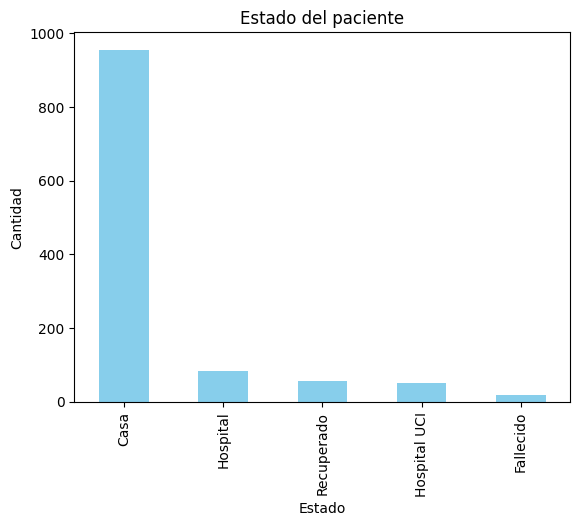

In [ ]:
## Grafico de barras que muestra la cantidad de personas de acuerco con el estado,
## Para este caso, el estado corresponde a 5 opciones, si la persona contagiada con COVID-19
## se encuentra en casa, hospitalizado, fallecido, recuperado o en UCI.

df_2['Atencion'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Estado del paciente')
plt.xlabel('Estado')
plt.ylabel('Cantidad')
plt.show()



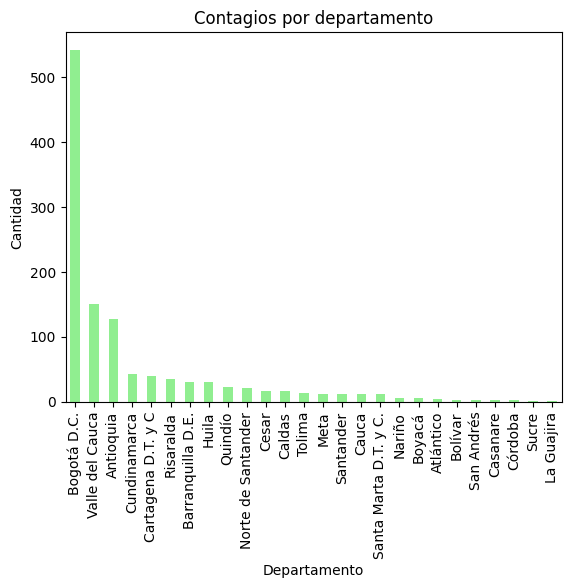

In [ ]:
## En este grafico se indica la cantidad de contagios por departamento o ciudad principal.

df_2['Departamento o Distrito'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Contagios por departamento')
plt.xlabel('Departamento')
plt.ylabel('Cantidad')
plt.show()

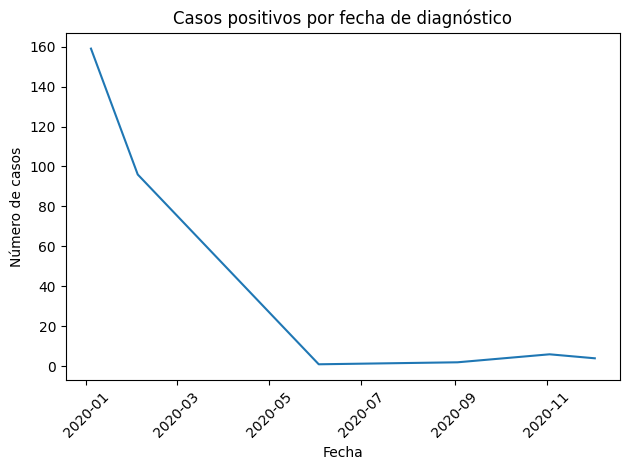

In [ ]:
# Casos por fecha de diagnóstico
casos_por_fecha = df_2.groupby(df_2['Fecha de diagnóstico'].dt.date).size()

casos_por_fecha.plot(kind='line')
plt.title("Casos positivos por fecha de diagnóstico")
plt.xlabel("Fecha")
plt.ylabel("Número de casos")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

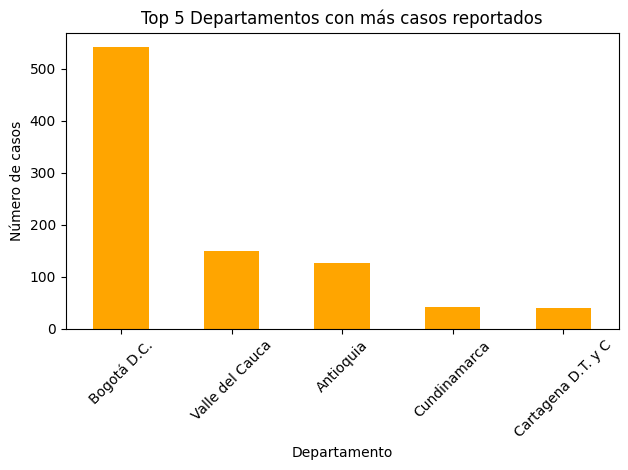

In [ ]:
# Top 10 departamentos con más casos
# -----------------------------
plt.figure()
df_2['Departamento o Distrito'].value_counts().head(5).plot(kind='bar', color='orange')
plt.title("Top 5 Departamentos con más casos reportados")
plt.xlabel("Departamento")
plt.ylabel("Número de casos")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

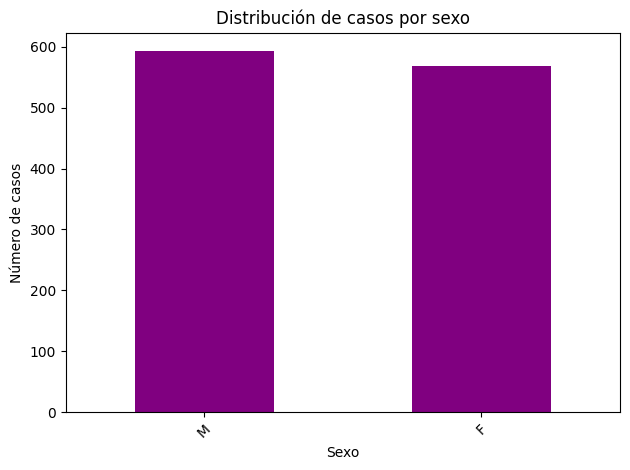

In [ ]:
#Casos por sexo
plt.figure()
df_2['Sexo'].value_counts().plot(kind='bar', color='purple')
plt.title("Distribución de casos por sexo")
plt.xlabel("Sexo")
plt.ylabel("Número de casos")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

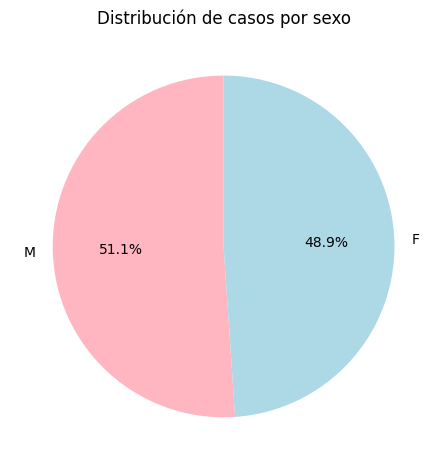

In [ ]:
# Crear gráfico de torta
plt.figure()
df_2['Sexo'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightpink', 'lightblue'])
plt.title("Distribución de casos por sexo")
plt.ylabel("")  # Eliminar etiqueta del eje y
plt.tight_layout()
plt.show()

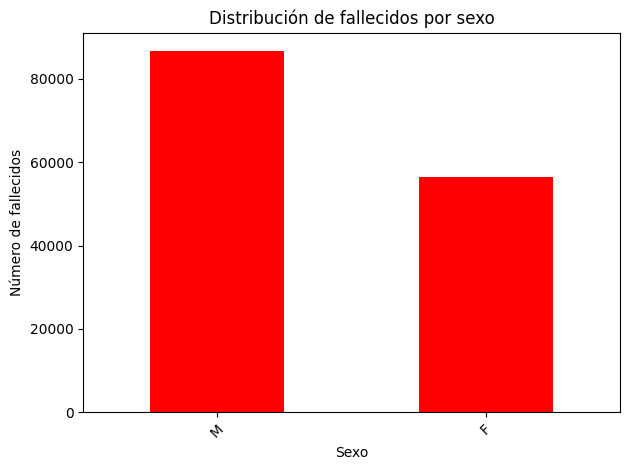

In [ ]:
# Grafico de fallecidos por sexo
plt.figure()
df_2[df_2['Estado'] == 'Fallecido']['Sexo'].value_counts().plot(kind='bar', color='red')
plt.title("Distribución de fallecidos por sexo")
plt.xlabel("Sexo")
plt.ylabel("Número de fallecidos")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/tmp/ipykernel_7061/1678911503.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_2['Edad'].fillna(df_2['Edad'].mean(), inplace=True)


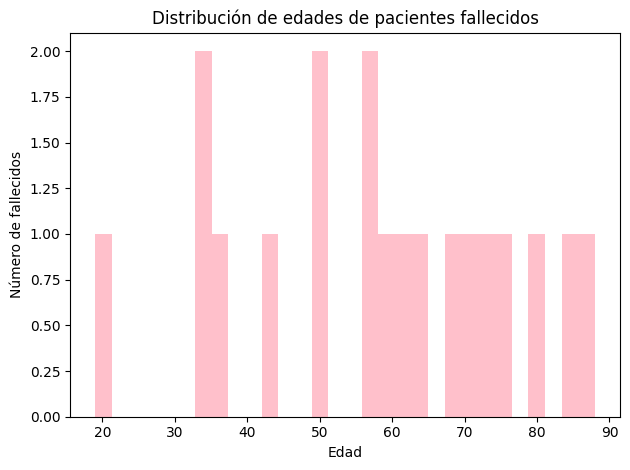

In [ ]:
# Distribución de las edades de los pacientes fallecidos
## Esta grafica esta hecha para observar la distribución de edades de los pacientes que han fallecido
## en el país. Para esto, se filtran los datos para que solo se muestren los pacientes que han fallecido.
## Luego, se crea un histograma con 30 bins (intervalos) y el color rosa.

df_2['Edad'] = pd.to_numeric(df_2['Edad'], errors='coerce')
df_2['Edad'].fillna(df_2['Edad'].mean(), inplace=True)
df_2['Edad'] = df_2['Edad'].astype(int)

# Histograma de edades de pacientes fallecidos

plt.figure()
df_2[df_2['Atencion'] == 'Fallecido']['Edad'].plot(kind='hist', bins=30, color='pink')
plt.title("Distribución de edades de pacientes fallecidos")
plt.xlabel("Edad")
plt.ylabel("Número de fallecidos")
plt.tight_layout()
plt.show()



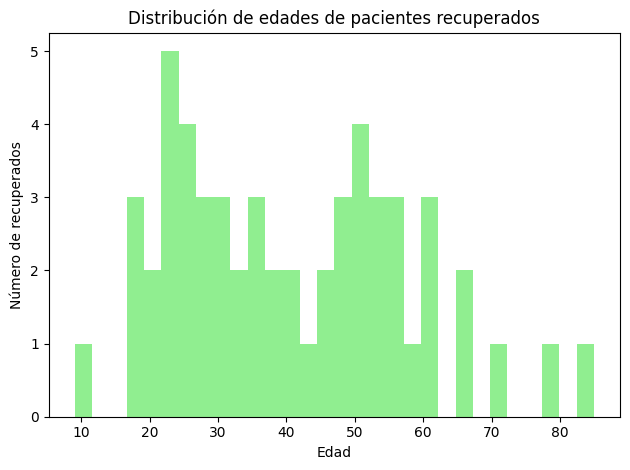

In [ ]:
# Distribución de edades de los pacientes recuperados
plt.figure()
df_2[df_2['Atencion'] == 'Recuperado']['Edad'].plot(kind='hist', bins=30, color='lightgreen')
plt.title("Distribución de edades de pacientes recuperados")
plt.xlabel("Edad")
plt.ylabel("Número de recuperados")
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

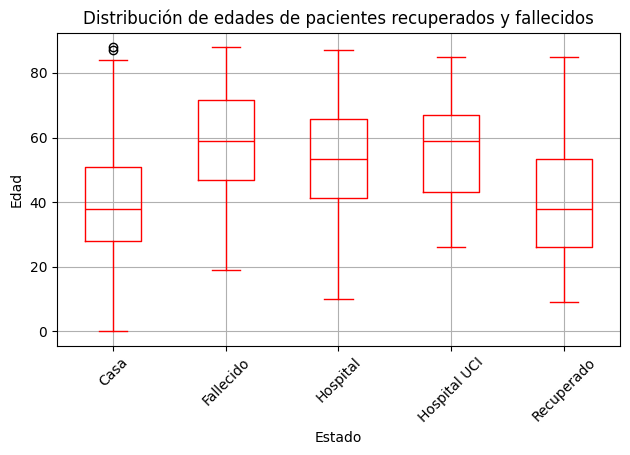

In [ ]:
# Distribución de edades de los pacientes recuperados- Fallecidos- N/A
plt.figure()
df_2.boxplot(column='Edad', by='Atencion', color='red')
plt.title("Distribución de edades de pacientes recuperados y fallecidos")
plt.suptitle("")  # Eliminar el título por defecto
plt.xlabel("Estado")
plt.ylabel("Edad")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()         

1161 1161


<Figure size 1000x600 with 0 Axes>

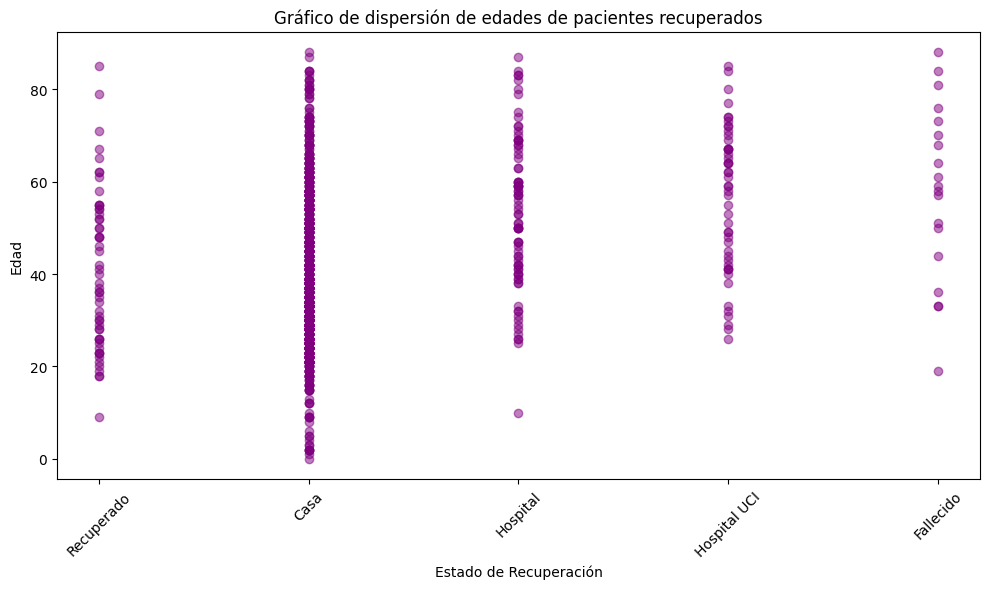

In [ ]:
# Grafico de dispersion de edades de los pacientes recuperados
plt.figure(figsize=(10, 6))

# Filtrar filas donde 'Edad' y 'Recuperado' no son NaN
df_filtrado = df_2.dropna(subset=['Edad', 'Atencion'])

# Convertir 'Edad' a numérico (en caso no lo hayas hecho ya)
df_filtrado['Edad'] = pd.to_numeric(df_filtrado['Edad'], errors='coerce')

# Convertir 'Recuperado' a texto
df_filtrado['Atencion'] = df_filtrado['Atencion'].astype(str)

# Confirmar tamaños iguales
print(len(df_filtrado['Atencion']), len(df_filtrado['Edad'])) 

# Crear gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(df_filtrado['Atencion'], df_filtrado['Edad'], color='purple', alpha=0.5)
plt.title("Gráfico de dispersión de edades de pacientes recuperados")
plt.xlabel("Estado de Recuperación")
plt.ylabel("Edad")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


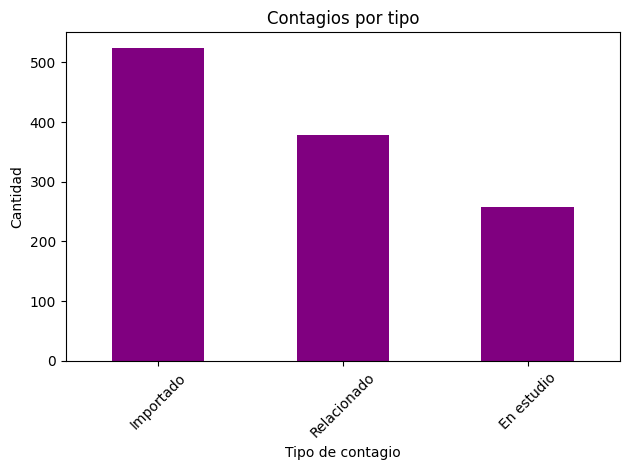

In [ ]:
## grafica de cantidad de contagiados por tipo de contagio
df_2['Tipo'].value_counts().plot(kind='bar', color='purple')
plt.title("Contagios por tipo")
plt.xlabel("Tipo de contagio")
plt.ylabel("Cantidad")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
df_2.shape

(1161, 9)

In [ ]:
df_2.head(10)

,ID de caso,Fecha de diagnóstico,Ciudad de ubicación,Departamento o Distrito,Atencion,Edad,Sexo,Tipo,País de procedencia
0,1,2020-06-03,Bogotá,Bogotá D.C.,Recuperado,19,F,Importado,Italia
1,2,2020-09-03,Buga,Valle del Cauca,Recuperado,34,M,Importado,España
2,3,2020-09-03,Medellín,Antioquia,Recuperado,50,F,Importado,España
3,4,2020-11-03,Medellín,Antioquia,Recuperado,55,M,Relacionado,Colombia
4,5,2020-11-03,Medellín,Antioquia,Recuperado,25,M,Relacionado,Colombia
5,6,2020-11-03,Itagüí,Antioquia,Casa,27,F,Relacionado,Colombia
6,7,2020-11-03,Cartagena,Cartagena D.T. y C,Recuperado,85,F,Importado,Estados Unidos
7,8,2020-11-03,Bogotá,Bogotá D.C.,Recuperado,22,F,Importado,España
8,9,2020-11-03,Bogotá,Bogotá D.C.,Recuperado,28,F,Importado,España - Italia
9,10,2020-12-03,Bogotá,Bogotá D.C.,Recuperado,36,F,Importado,España


In [ ]:
df_2.head()
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1161 entries, 0 to 1160
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ID de caso               1161 non-null   int64         
 1   Fecha de diagnóstico     268 non-null    datetime64[ns]
 2   Ciudad de ubicación      1161 non-null   object        
 3   Departamento o Distrito  1161 non-null   object        
 4   Atencion                 1161 non-null   object        
 5   Edad                     1161 non-null   int64         
 6   Sexo                     1161 non-null   object        
 7   Tipo                     1161 non-null   object        
 8   País de procedencia      1161 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 81.8+ KB


## Examinar la capacidad predictiva del modelo
**Teniendo como variable objetivo los dias de recuperación**

*Los días de recuperación corresponden a "Fecha de recuperación - Fecha de inicio de síntomas"*

<img src="https://upload.wikimedia.org/wikipedia/commons/3/3a/Linear_regression.svg" alt="Regresión" width="100">

## **Se va a realizar la regresión**

In [ ]:
%pip install scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

911.62s - pydevd: Sending message related to process being replaced timed-out after 5 seconds



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
